In [2]:
import pandas as pd

# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
import numpy as np
ad_cost = np.asarray([data['TV'].values,data['radio'].values,data['newspaper'].values]).T
sales = np.asarray(data['sales'].values)

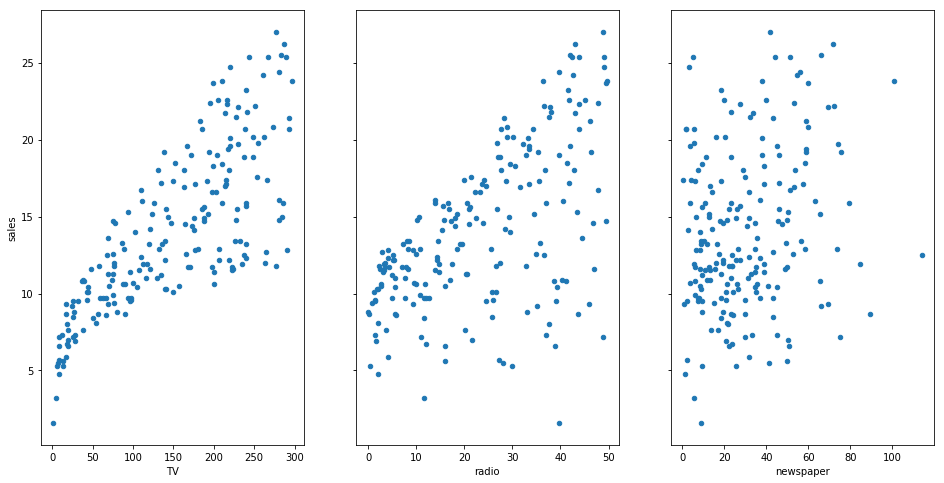

In [9]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_regression

In [175]:
x, y = make_regression(n_samples = 1000, 
                       n_features=1, 
                       noise=50,
                       random_state=42)

In [176]:
x[:10]

array([[-1.75873949],
       [ 1.03184454],
       [-0.48760622],
       [ 0.18645431],
       [ 0.72576662],
       [ 0.97255445],
       [ 0.64537595],
       [ 0.68189149],
       [-1.43014138],
       [ 1.06667469]])

In [177]:
x = x.flatten()


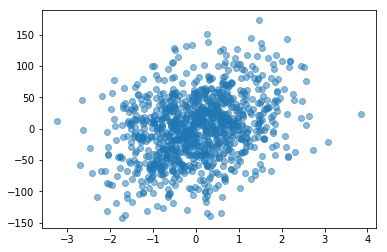

In [178]:
plt.plot(x,y, 'o', alpha=0.5)

In [179]:
def hypothesis_function(X, w):
    return X.dot(w)

In [180]:
def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [181]:
def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0

    y_hat = hypothesis_function(x, theta)
    currentcost = cost_function(y_hat, y)

    preds.append(y_hat)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    
    error = y_hat - y
    
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        y_hat = hypothesis_function(x, theta)
        error = y_hat - y 
        
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(y_hat)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

In [238]:
def gradient_descent(x, y, theta_init, step=0.0001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0

    
    y_hat = hypothesis_function(x, theta)
    currentcost = cost_function(y_hat, y)    
    preds.append(y_hat)
    costs.append(currentcost)
    history.append(theta)

    
    BATCH_SIZE = 50
    for epoch in range(10):
        order = np.arange(len(x))
        np.random.shuffle(order)
        for counter in range(0, len(order) // BATCH_SIZE):
            elem_list = order[counter*BATCH_SIZE : (counter+1)*BATCH_SIZE]

            x_batch = x[elem_list,:]
            y_batch = np.take(y, elem_list)
            
            y_hat = hypothesis_function(x_batch, theta)


            error = y_hat - y_batch

            gradient = x_batch.T.dot(error)/m 
            theta = theta - step * gradient  # update
            history.append(theta)

            y_hat = hypothesis_function(x_batch, theta)
            error = y_hat - y_batch 

            currentcost = np.sum(error ** 2) / (2 * m)
            costs.append(currentcost)

            if counter % 25 == 0: preds.append(y_hat)
#         if abs(currentcost - oldcost) > precision:
#             break
    return history, costs, preds, counter

In [239]:
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]

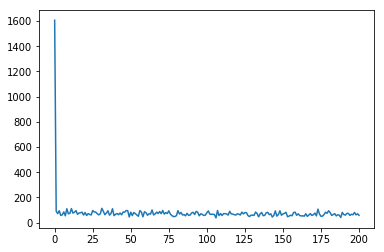

In [240]:
plt.plot(range(len(cost)), cost);


In [241]:
from JSAnimation import IPython_display
slope, intercept, _,_,_ = stats.linregress(x,y)
best_fit = np.vectorize(lambda x: x * slope + intercept)

In [242]:
def init():
    line.set_data([], [])
    return line,

def animate(i):
    ys = preds[i]
    line.set_data(xaug[:, 1], ys)
    return line,



fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 2.5), ylim=(-170, 170))
ax.plot(xaug[:,1],y, 'o')
line, = ax.plot([], [], lw=2)
plt.plot(xaug[:,1], best_fit(xaug[:,1]), 'k-', color = "r")

anim = animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(preds), interval=100)
# anim.save('images/gdline.mp4')
anim

ValueError: shape mismatch: objects cannot be broadcast to a single shape

/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


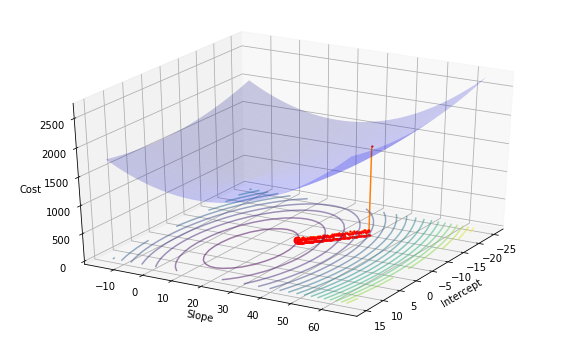

In [243]:
from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);
#ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);

In [260]:
xaug = np.hstack( (np.ones( shape=(200,1) ), ad_cost))
theta_i = np.random.rand(len(xaug[0]))
history, cost, preds, iters = gradient_descent(xaug, sales, theta_i, step=0.0001)
theta = history[-1]

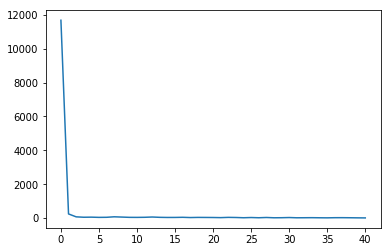

In [261]:
plt.plot(range(len(cost)), cost);
